In [73]:
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import the Dataset

In [75]:
df_original = pd.read_csv("spam_ham_dataset.csv")
df_original

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [76]:
df_original.shape

(5171, 4)

In [77]:
df_original.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [78]:
df = df_original[['text', 'label_num']]

In [79]:
df['text'] = df['text'].apply(lambda x: x.replace('\r\n', ' '))

C:\Users\Adam\AppData\Local\Temp\ipykernel_21568\1096363583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.replace('\r\n', ' '))


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [81]:
stemmer = PorterStemmer()
corpus = []

stopwords_set = set(stopwords.words('english'))

for i in range(len(df)):
    text = df['text'].iloc[i].lower()
    text = text.translate(str.maketrans('','',string.punctuation)).split()
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    text = ' '.join(text)
    corpus.append(text)

In [82]:
df.text.iloc[0]

"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."

In [83]:
corpus[0]

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [84]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus).toarray()
y = df.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train the model

In [85]:
clf = RandomForestClassifier(n_jobs = -1)

clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluate the model

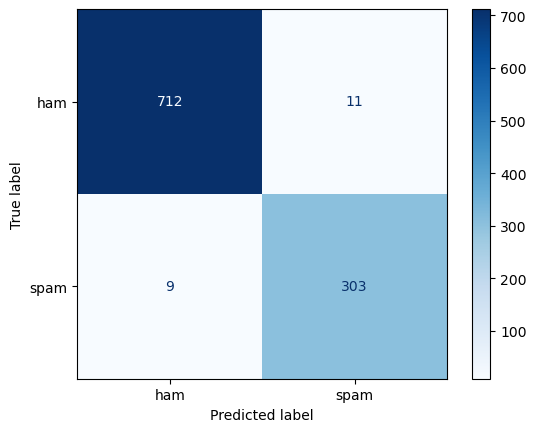

Accuracy Score:  0.9806763285024155


In [90]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

cm_labels = ['ham', 'spam']

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = cm_labels)
disp.plot(cmap='Blues')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accuracy)

## Create a Pipeline for classifying other emails

In [91]:
def classify_email(email):
    email_text = email.replace('\r\n', ' ').lower()
    email_text = email_text.translate(str.maketrans('','',string.punctuation)).split()
    email_text = [stemmer.stem(word) for word in email_text if word not in stopwords_set]
    email_text = ' '.join(email_text)
    email_corpus = [email_text]
    X_email = vectorizer.transform(email_corpus)
    prediction = clf.predict(X_email)

    if prediction == 0:
        print("The email is not spam")
    else:
        print("The email is spam")

## Test the pipeline

In [92]:
email = df_original.text.iloc[10]
email_label = df_original.label_num.iloc[10]

classify_email(email)
print("True answer: ", "Not spam" if email_label == 0 else "spam")

The email is spam
True answer:  spam
